# Proof-of-Concept: Janken++
Kode ini merupakan sebuah game sederhana dimana pemain dapat mengupload gambar tangan mereka yang kemudian melawan jawaban dari komputer.

## Prediksi
Bagian yang memprediksi gambar menjadi kelas gambarnya.

In [7]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

# Load model, ganti dengan model yang ingin diuji
model = torch.load('finetuned_alexnet_AdamW_v3.pt')
# Mendefinisikan bagian preprocessing input
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Fungsi utama predict
def predict(model,image):
    # Preprocess gambar
    preprocessed_image = transform(image)
    # Tambah satu dimensi untuk batch size (jika terdapat beberapa gambar dapat melewati line ini)
    input_tensor = preprocessed_image.unsqueeze(0).to(device)
    
    # Prediksi outputnya
    output = model(input_tensor)
    
    # Ambil nilai probabilitas dari tiap kelas
    probabilities = torch.nn.functional.softmax(output, dim=1)[0]
    
    # Probabilitas tertinggi sebagai outputnya
    predicted_class_index = torch.argmax(probabilities).item()
    # Ubah jadi nama kelas
    class_labels = ['Batu', 'Gunting', 'Kertas', 'Lizard', 'Spock']
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

## Game Logic
Bagian yang mendefinisikan dari game Janken++ (dengan tambahan Lizard dan Spock).

In [8]:
import random

def play_game(player_choice):
    choices = ['Batu', 'Gunting', 'Kertas', 'Lizard', 'Spock']
    computer_choice = random.choice(choices)
    
    print(f"Kamu pilih: {player_choice}")
    print(f"Komputer pilih: {computer_choice}")
    
    if player_choice == computer_choice:
        print("Seri!")
    elif player_choice == 'Batu':
        if computer_choice == 'Gunting' or computer_choice == 'Lizard':
            print("Kamu Menang!")
        else:
            print("Yah kalah...")
    elif player_choice == 'Kertas':
        if computer_choice == 'Batu' or computer_choice == 'Spock':
            print("Kamu Menang!")
        else:
            print("Yah kalah...")
    elif player_choice == 'Gunting':
        if computer_choice == 'Kertas' or computer_choice == 'Lizard':
            print("Kamu Menang!")
        else:
            print("Yah kalah...")
    elif player_choice == 'Spock':
        if computer_choice == 'Batu' or computer_choice == 'Gunting':
            print("Kamu Menang!")
        else:
            print("Yah kalah...")
    elif player_choice == 'Lizard':
        if computer_choice == 'Kertas' or computer_choice == 'Spock':
            print("Kamu Menang!")
        else:
            print("Yah kalah...")
    else:
        print("Error, cek input!")

## Yuk Main!
Tempat pemain dapat meletakan gambar dari tangannya, untuk improvement bisa diganti menjadi interface yang real-time menggunakan kamera.

Predicted class: Kertas


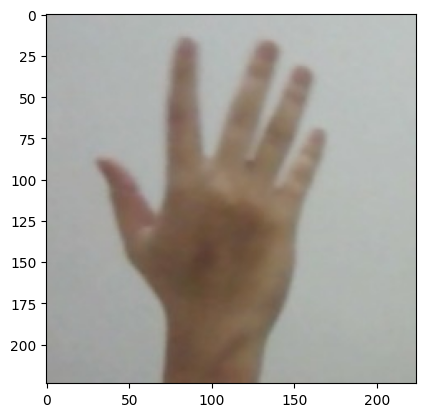

In [9]:
# Masukan path dari gambar pemain disini
image_path = 'Dataset/Kertas/1/135.jpg'
image = Image.open(image_path)

# Inisialisasi device yang digunakan
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Memasukan model ke device
model = model.to(device)

predicted_class_label = predict(model,image)

# Hasil prediksi
print(f"Predicted class: {predicted_class_label}")
plt.imshow(image)

In [11]:
# YUK MAIN!
play_game(predicted_class_label)

Kamu pilih: Kertas
Komputer pilih: Batu
Kamu Menang!
